# Preprocessing 

In [41]:
# import relevant packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import numpy as np 

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

sns.set_theme()

### Before and After 

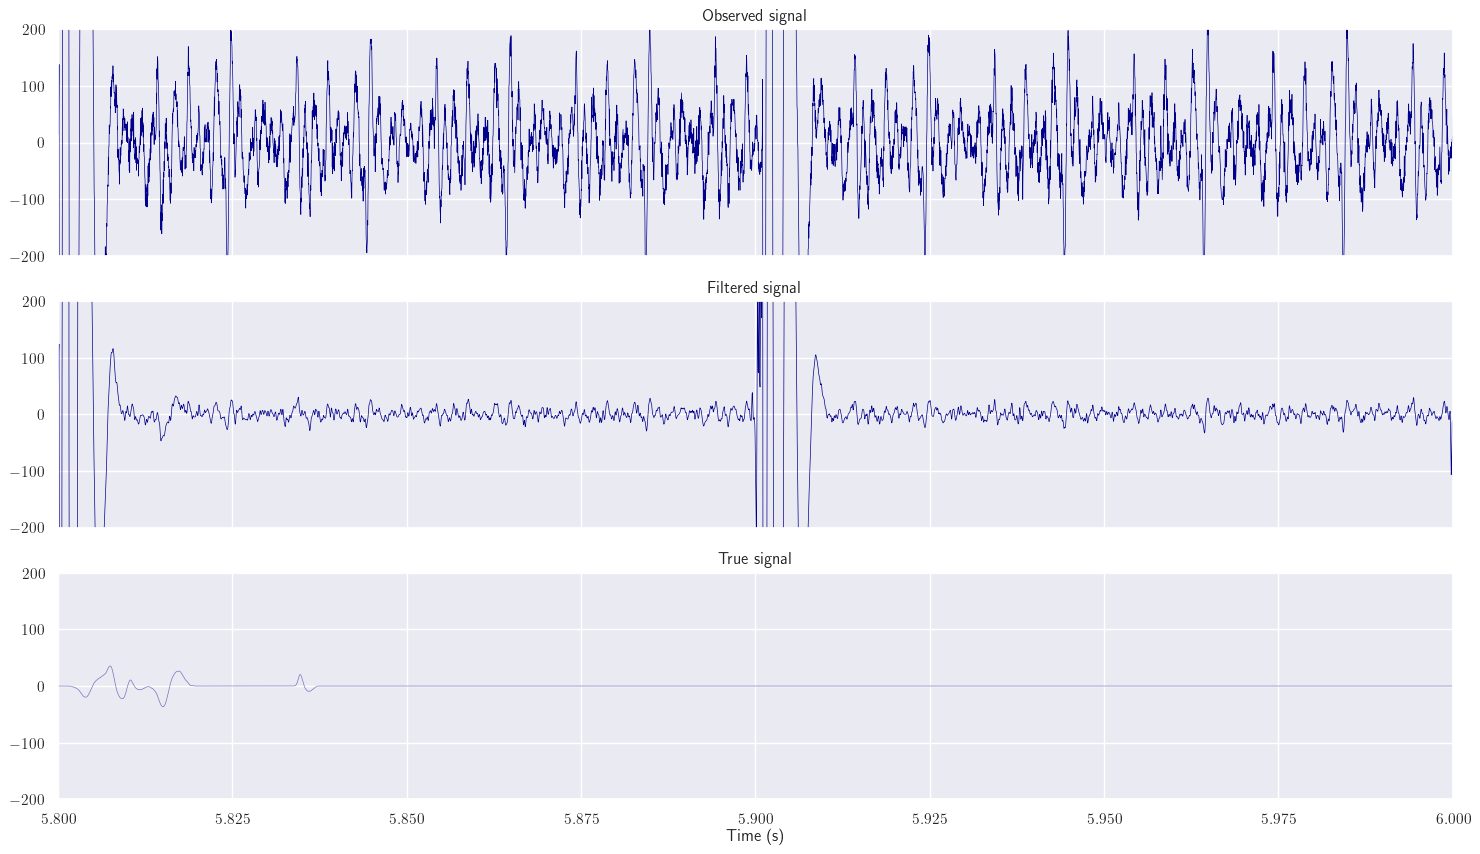

In [42]:
path = "../../results/baseline/noise_config_0/snr_1_count_0.pkl"
with open(path, 'rb') as f:
    file = pickle.load(f)
f.close()

x_axis = np.arange(len(file['filtered_signal'])) / 30000
channel = 0

fig, ax = plt.subplots(3, 1, figsize = (18, 10), sharex=True)

ax[0].plot(x_axis, file['obs_signal'][:, channel], color = "darkblue", linewidth = 0.5)
ax[0].set_title("Observed signal")

ax[1].plot(x_axis, file['filtered_signal'][:, channel], color = "darkblue", linewidth = 0.5)
ax[1].set_title("Filtered signal")

ax[2].plot(x_axis, file['true_signal'][:, channel], color = "darkblue", alpha = 0.5, linewidth = 0.5)
ax[2].set_title("True signal")

ax[2].set_xlabel("Time (s)")
[a.set_xlim([5.8, 6]) for a in ax]           
[a.set_ylim([-200, 200]) for a in ax]

plt.show()

savefig(fig, "preprocessing_example", width=(21-3)/2.54, height=(21-3)/2.54*0.55)
